## Shubham Tade : 
# Project: Detecting Pneumonia in Chest X-Rays Classification with CNN

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [41]:
train_path = r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\train"
test_path = r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\test"
validation_path = r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val"

In [42]:
img_width , img_height = 224, 224

In [43]:
batch_size = 40

In [44]:
train_dataset = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                   shear_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True                                 
                                   )


In [45]:
val_dataset = ImageDataGenerator(rescale=1.0/255)

In [46]:
test_dataset = ImageDataGenerator(rescale=1.0/255)

In [47]:
train_img = train_dataset.flow_from_directory( train_path ,target_size=(img_width,img_height) , batch_size=batch_size , class_mode='categorical')

Found 2376 images belonging to 2 classes.


In [48]:
test_img = test_dataset.flow_from_directory(test_path , target_size=(img_width,img_height) , batch_size=batch_size , class_mode='categorical')

Found 400 images belonging to 2 classes.


In [49]:
val_img = val_dataset.flow_from_directory(validation_path , target_size=(img_width,img_height) , batch_size=batch_size , class_mode='categorical')

Found 401 images belonging to 2 classes.


In [50]:
train_img.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [51]:
classes = ['NORMAL', 'PNEUMONIA']

In [52]:
model = Sequential([

    Conv2D(32,(3,3), activation='relu',input_shape=(img_width,img_height,3)),
    Conv2D(32,(3,3) , activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(16,(3,3),activation='relu'),
    Conv2D(8,(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(30,activation='relu'),
    Dense(2,activation='softmax')  
])

In [53]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [54]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [55]:
history1 = model.fit(train_img,epochs=15 ,batch_size=batch_size, validation_data= val_img)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.5836 - loss: 0.6585 - val_accuracy: 0.6608 - val_loss: 0.6675
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8330 - loss: 0.4324 - val_accuracy: 0.7481 - val_loss: 0.5311
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8347 - loss: 0.3970 - val_accuracy: 0.8304 - val_loss: 0.4786
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8661 - loss: 0.3480 - val_accuracy: 0.8379 - val_loss: 0.4281
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8997 - loss: 0.2818 - val_accuracy: 0.8504 - val_loss: 0.3577
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9063 - loss: 0.2391 - val_accuracy: 0.8678 - val_loss: 0.3468
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9134 - loss: 0.2378 - val_accuracy: 0.8878 - val_loss: 0.3056
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9270 - loss: 0.2165 - val_accuracy: 0.8853 - v

In [69]:
test_loss, test_accuracy = model.evaluate(test_img)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 570ms/step - accuracy: 0.7933 - loss: 0.4617
Test Loss: 0.503944993019104, Test Accuracy: 0.7799999713897705


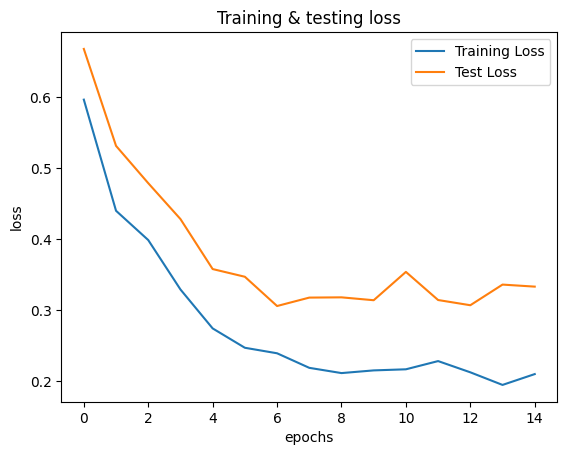

In [56]:
plt.plot(history1.history['loss'] , label='Training Loss')
plt.plot(history1.history['val_loss'] , label='Test Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training & testing loss')
plt.show()



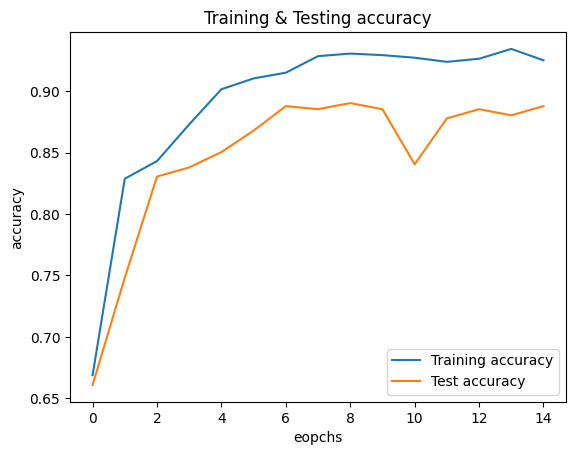

In [57]:
plt.plot(history1.history['accuracy'] , label='Training accuracy')
plt.plot(history1.history['val_accuracy'] , label = 'Test accuracy')
plt.legend()
plt.xlabel('eopchs')
plt.ylabel('accuracy')
plt.title('Training & Testing accuracy')
plt.show()

In [60]:
def predict(path):
    img = load_img(path , target_size = (224,224,3))
    img_arr = img_to_array(img)
    norm= img_arr/255.0
    flat = np.expand_dims(norm , axis=0)
    pred = model.predict(flat)[0]
    clas = classes[np.argmax(pred)]
    return clas

In [61]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val\NORMAL\NORMAL2-IM-1427-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


'NORMAL'

In [62]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val\NORMAL\NORMAL2-IM-1430-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'NORMAL'

In [63]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val\PNEUMONIA\person1946_bacteria_4874.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'PNEUMONIA'

In [64]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val\PNEUMONIA\person1946_bacteria_4875.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'PNEUMONIA'

In [65]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val\NORMAL\NORMAL2-IM-1442-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'NORMAL'

In [66]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Detecting Pneumonia in Chest X-Rays Classification with CNN\Data\val\NORMAL\NORMAL2-IM-1440-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'NORMAL'

In [ ]:
# def predict(image_path):
#        img = load_img(image_path, target_size=(512, 512))
#        img_arr = img_to_array(img)
#        norm = img_arr / 255.0
#        flat = np.expand_dims(norm, axis=0)
#        pred = model.predict(flat)[0]
#        clas = classes[np.argmax(pred)]
#        return clas

In [ ]:
# predictions = []
#    for i in range(8):
#        image_path = f'path_to_your_folder/image_{i}.jpg'  # Update the path and naming convention as needed
#        class_prediction = predict(image_path)
#        predictions.append(class_prediction)

## the model perform and predict the output very well

In [73]:
from joblib import dump

In [74]:
model.save('Detecting Pneumonia in Chest X-Rays Classification with CNN Dump file.h5')

In [75]:
dump(model,'Detecting Pneumonia in Chest X-Rays Classification with CNN Dump file.joblib')

['Detecting Pneumonia in Chest X-Rays Classification with CNN Dump file.joblib']

## dump (save) the model 